## Training - 2
### MohammadFathan-21.11.3844

In [1]:
import pandas as pd
from sklearn.utils import resample
# 1. Load dataset
df = pd.read_csv('data_komentar_dengan_prediksi - data_komentar_dengan_prediksi.csv')


df_majority = df[df['label'] == 0]  
df_minority = df[df['label'] == 1] 
df_majority_undersampled = resample(df_majority,
                                   replace=False,    # Tanpa penggantian (undersampling)
                                   n_samples=len(df_minority),  # Ukuran sama dengan minoritas
                                   random_state=42)  # Untuk reproduktibilitas

df_balanced = pd.concat([df_majority_undersampled, df_minority])
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n" + "="*50)
print("LABEL DISTRIBUTION")
print("="*50)
print(f"Jumlah label 1: {df['label'].sum()}")  # Asumsi label binary 0/1
print(f"Jumlah label 0: {len(df) - df['label'].sum()}")
print(f"Persentase label 1: {df['label'].mean():.2%}")
print(f"Persentase label 0: {1 - df['label'].mean():.2%}")
print("\n" + "="*50)
print("DATA SPLIT 80:20")
print("="*50)
train_size = int(0.8 * len(df))
test_size = len(df) - train_size
print(f"Jumlah data training (80%): {train_size}")
print(f"Jumlah data testing (20%): {test_size}")


LABEL DISTRIBUTION
Jumlah label 1: 4209
Jumlah label 0: 4209
Persentase label 1: 50.00%
Persentase label 0: 50.00%

DATA SPLIT 80:20
Jumlah data training (80%): 6734
Jumlah data testing (20%): 1684


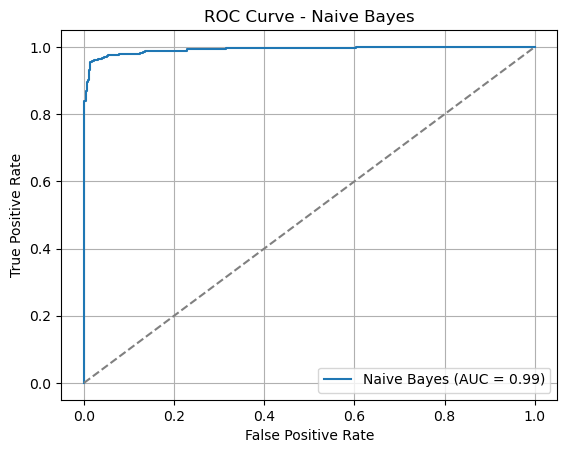

Laporan Klasifikasi Naive Bayes
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       869
           1       0.92      0.98      0.95       815

    accuracy                           0.95      1684
   macro avg       0.95      0.95      0.95      1684
weighted avg       0.95      0.95      0.95      1684



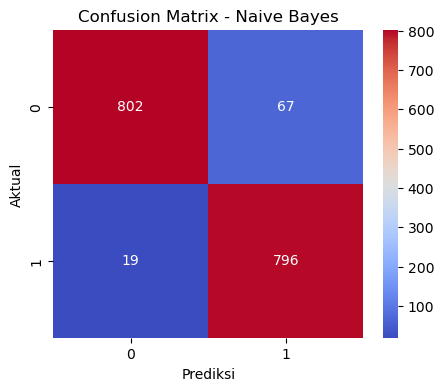

Model 'Naive Bayes' telah disimpan di: saved_models/Naive Bayes.joblib


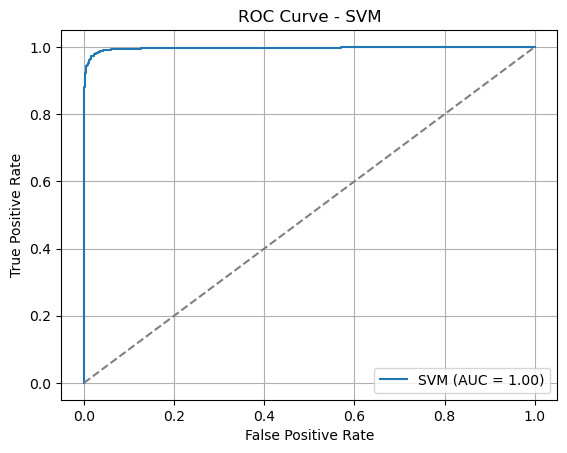

Laporan Klasifikasi SVM
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       869
           1       0.99      0.95      0.97       815

    accuracy                           0.97      1684
   macro avg       0.97      0.97      0.97      1684
weighted avg       0.97      0.97      0.97      1684



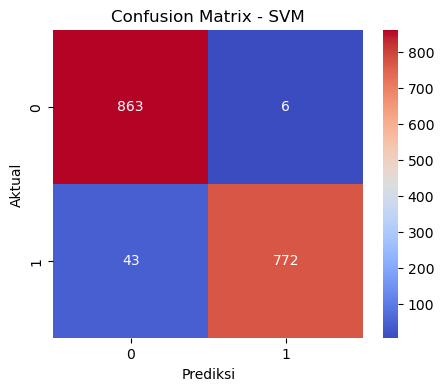

Model 'SVM' telah disimpan di: saved_models/SVM.joblib
Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


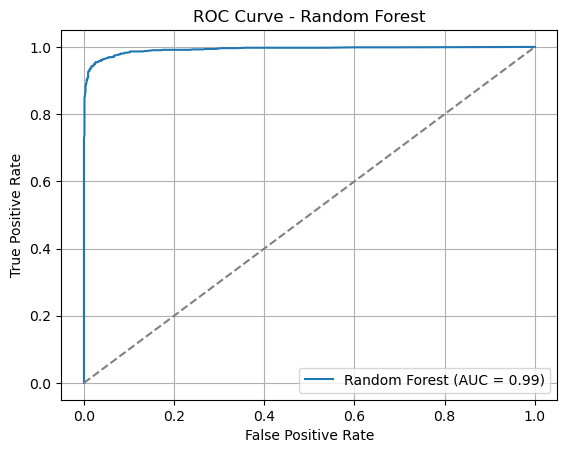

Laporan Klasifikasi Random Forest
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       869
           1       0.97      0.95      0.96       815

    accuracy                           0.96      1684
   macro avg       0.96      0.96      0.96      1684
weighted avg       0.96      0.96      0.96      1684



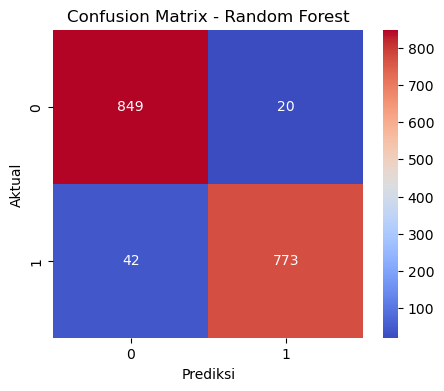

Model 'Random Forest' telah disimpan di: saved_models/Random Forest.joblib


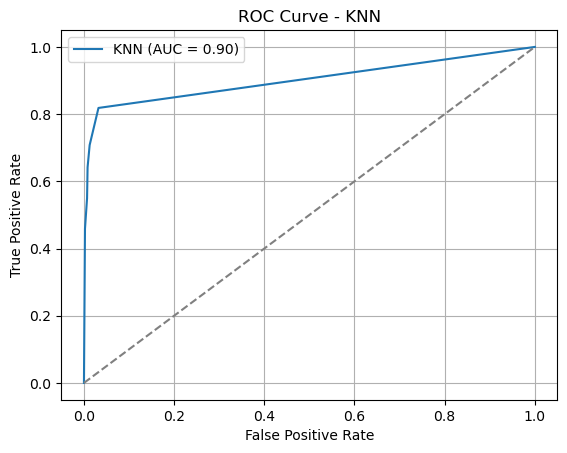

Laporan Klasifikasi KNN
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       869
           1       0.99      0.64      0.78       815

    accuracy                           0.82      1684
   macro avg       0.87      0.82      0.81      1684
weighted avg       0.86      0.82      0.82      1684



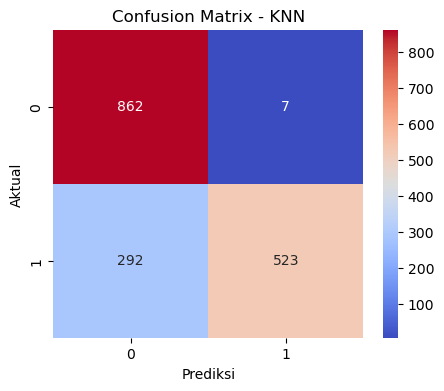

Model 'KNN' telah disimpan di: saved_models/KNN.joblib


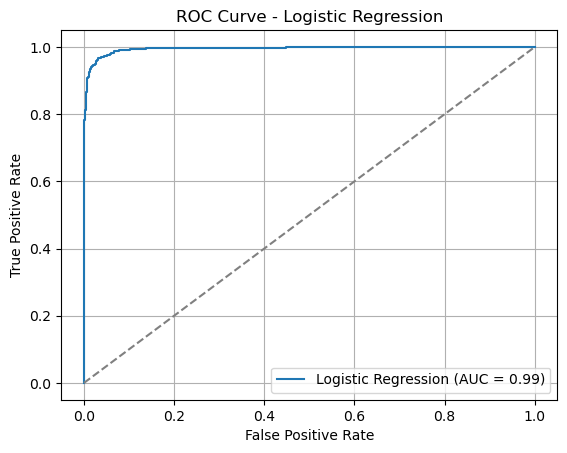

Laporan Klasifikasi Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       869
           1       0.99      0.92      0.95       815

    accuracy                           0.96      1684
   macro avg       0.96      0.96      0.96      1684
weighted avg       0.96      0.96      0.96      1684



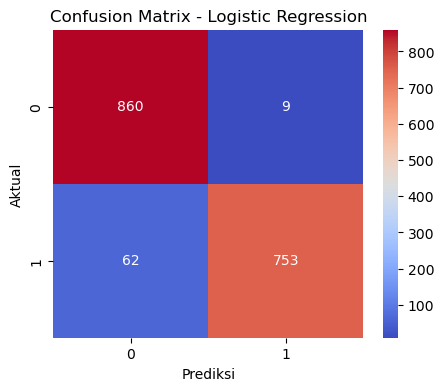

Model 'Logistic Regression' telah disimpan di: saved_models/Logistic Regression.joblib


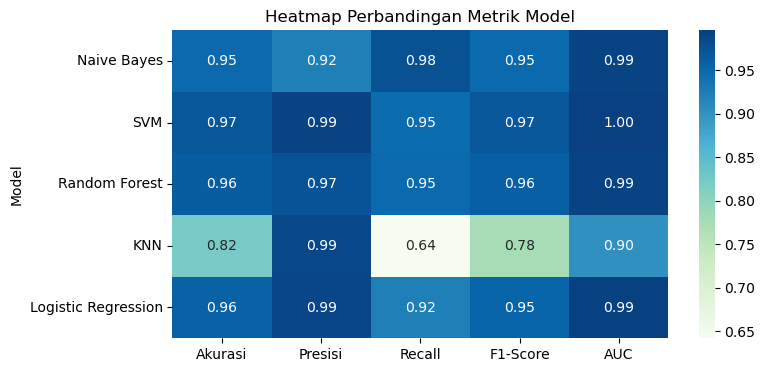

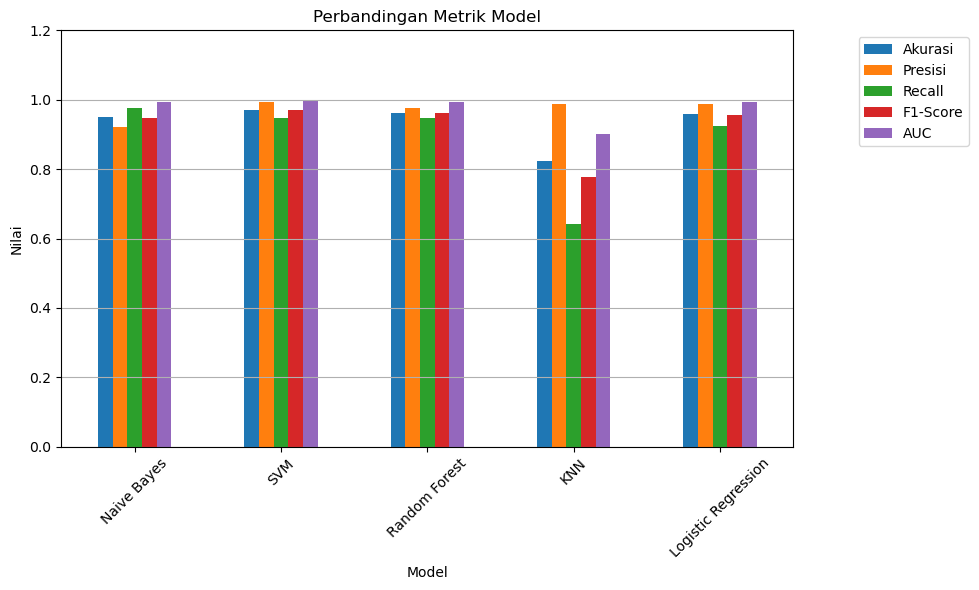

Tabel Perbandingan Model:


,Model,Akurasi,Presisi,Recall,F1-Score,AUC
0,Naive Bayes,0.948931,0.922364,0.976687,0.948749,0.992453
1,SVM,0.970903,0.992288,0.947239,0.969240,0.996229
2,Random Forest,0.963183,0.974779,0.948466,0.961443,0.992713
3,KNN,0.822447,0.986792,0.641718,0.777695,0.901478
4,Logistic Regression,0.957838,0.988189,0.923926,0.954978,0.994300


['saved_models/label_encoder.joblib']

In [3]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Fungsi menyimpan model
def save_model(model, model_name, folder='saved_models'):
    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, f'{model_name}.joblib')
    joblib.dump(model, filepath)
    print(f"Model '{model_name}' telah disimpan di: {filepath}")

# Confusion matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# ROC Curve

def plot_roc_auc(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()
    return auc

# Model Training Functions

def train_naive_bayes(X_train, y_train, X_test, y_test):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = plot_roc_auc(y_test, y_pred_proba, "Naive Bayes")
    print("Laporan Klasifikasi Naive Bayes")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, "Naive Bayes")
    return model, {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'auc': auc
    }

def train_svm(X_train, y_train, X_test, y_test):
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = plot_roc_auc(y_test, y_pred_proba, "SVM")
    print("Laporan Klasifikasi SVM")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, "SVM")
    return model, {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'auc': auc
    }

def train_random_forest(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, None],
        'min_samples_split': [2, 5],
    }
    grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    print("Best Hyperparameters (Random Forest):", grid.best_params_)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = plot_roc_auc(y_test, y_pred_proba, "Random Forest")
    print("Laporan Klasifikasi Random Forest")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, "Random Forest")
    return model, {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'auc': auc
    }

def train_knn(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = plot_roc_auc(y_test, y_pred_proba, "KNN")
    print("Laporan Klasifikasi KNN")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, "KNN")
    return model, {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'auc': auc
    }

def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = plot_roc_auc(y_test, y_pred_proba, "Logistic Regression")
    print("Laporan Klasifikasi Logistic Regression")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, "Logistic Regression")
    return model, {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'auc': auc
    }

# Load data
#df = pd.read_csv('data_komentar_dengan_prediksi - data_komentar_dengan_prediksi.csv')
X = df['komentar_clean'].values
y = df['label'].values

le = LabelEncoder()
y = le.fit_transform(y)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Penanganan Imbalance
def get_processed_data(method='original'):
    if method == 'original':
        return X_train, y_train, X_test, y_test
    else:
        raise ValueError("Method yang tersedia: 'original', 'smote', 'undersample'")

X_train_resampled, y_train_resampled, X_test, y_test = get_processed_data('original')

results = {}
models = {
    "Naive Bayes": train_naive_bayes,
    "SVM": train_svm,
    "Random Forest": train_random_forest,
    "KNN": train_knn,
    "Logistic Regression": train_logistic_regression
}

for name, model_func in models.items():
    model, metrics = model_func(X_train_resampled, y_train_resampled, X_test, y_test)
    results[name] = metrics
    save_model(model, name)

metrics_df = pd.DataFrame(results).T
metrics_df.reset_index(inplace=True)
metrics_df.columns = ['Model', 'Akurasi', 'Presisi', 'Recall', 'F1-Score', 'AUC']

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.set_index('Model'), annot=True, cmap='GnBu', fmt=".2f")
plt.title('Heatmap Perbandingan Metrik Model')
plt.show()

metrics_df.plot(x='Model', y=['Akurasi', 'Presisi', 'Recall', 'F1-Score', 'AUC'], 
                kind='bar', figsize=(10, 6))
plt.title('Perbandingan Metrik Model')
plt.xlabel('Model')
plt.ylabel('Nilai')
plt.ylim(0, 1.2)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

print("Tabel Perbandingan Model:")
display(metrics_df)

joblib.dump(tfidf, 'saved_models/tfidf_vectorizer.joblib')
joblib.dump(le, 'saved_models/label_encoder.joblib')


[86, 49, 65, 299, 71]


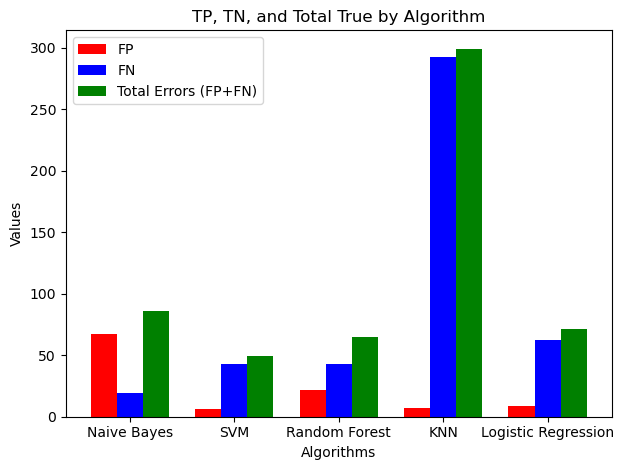

In [4]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Naive Bayes', 'SVM', 'Random Forest', 'KNN', 'Logistic Regression']
tp_values = [67, 6, 22, 7, 9]
tn_values = [19, 43, 43, 292, 62]
total_True = [fp + fn for fp, fn in zip(tp_values, tn_values)]  # Menghitung total kesalahan
print(total_True)
x = np.arange(len(algorithms))
width = 0.25  # Lebar bar diperkecil agar ketiga bar muat

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, tp_values, width, label='FP', color='red')
bars2 = ax.bar(x, tn_values, width, label='FN', color='blue')
bars3 = ax.bar(x + width, total_True, width, label='Total Errors (FP+FN)', color='green')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Values')
ax.set_title('TP, TN, and Total True by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

plt.tight_layout()  # Agar label tidak tumpang tindih
plt.show()


In [5]:
df.head()

,video_id,title,channel_name,tanggal,author,komentar,label,komentar_clean,predicted_label
0,zFhBO9uoGYA,INDONESIAN DRIFT SERIES TERAKHIR di sini,Om Mobi,2025-05-04 13:36:57+00:00,KeikoPatelDzu5a4d,kesempatan menang 𝐌𝐢𝐘𝐚𝟖𝟖 ! keseruannya bikin n...,1,kesempatan menang 𝐌𝐢𝐘𝐚𝟖𝟖 ! keseruannya bikin n...,1
1,gP0YCMCJnjA,Presiden Prabowo Menjawab,Narasi Newsroom,1.744.214.331.384.550,cozyday94,"yah minimal jangan typo bu, ngetiknya! ​ @Suli...",0,"yah minimal jangan typo bu , ngetiknya ! ​ -el8kl",0
2,XI8K0-_kbHc,GAK NYANGKA BISA BEGINI! PENGENDARA DIJALAN SA...,Jejelogy,1.739.774.292.226.520,glamourautoboutique,Thank you Mr Jeje ! 🔥🔥🔥🔥,0,thank you mr jeje !,0
3,Ou0UedfyuqU,"Kalau mau beli TV, saya bakal PILIH YANG BEGINI.",GadgetIn,2025-04-24 09:24:38+00:00,ToniWahyudi-o4c,udah banget menang 𝘼𝙇𝙀𝙓𝙄𝙎17,1,udah banget menang 𝘼𝙇𝙀𝙓𝙄𝙎17,1
4,ufS5vDKnIhM,MITSUBISHI TRITON ULTIMATE AT | Definisi Pria ...,Motomobi,2025-05-01 02:30:42+00:00,marasirfandi,"seminggu join alexis17 , gue udah beliin ortu ...",1,"seminggu join alexis17 , gue udah beliin ortu ...",1


In [6]:
print(f"Jumlah penulis : {df['author'].nunique()}")
print(f"Jumlah Channel : {df['channel_name'].nunique()}")
print(f"Jumlah Video : {df['title'].nunique()}")

Jumlah penulis : 7795
Jumlah Channel : 18
Jumlah Video : 32


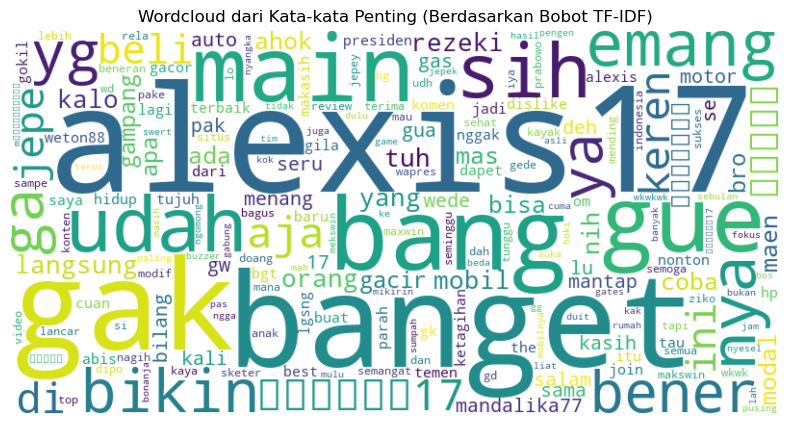

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Asumsi Anda sudah memuat data dan memiliki DataFrame 'df' dengan kolom 'komentar_clean'
# Contoh memuat data (ganti dengan path file Anda)
df = pd.read_csv('data_komentar_dengan_prediksi - data_komentar_dengan_prediksi.csv')
X = df['komentar_clean'].values

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Wordcloud dari bobot TF-IDF
vocabulary = tfidf.get_feature_names_out()
word_frequencies = np.array(X_tfidf.sum(axis=0)).flatten()
word_frequency_dict = dict(zip(vocabulary, word_frequencies))

# Urutkan kata berdasarkan frekuensi (bobot) tertinggi
sorted_word_frequencies = dict(sorted(word_frequency_dict.items(), key=lambda item: item[1], reverse=True))

# Ambil beberapa kata teratas untuk wordcloud (misalnya 200 kata)
top_words = dict(list(sorted_word_frequencies.items())[:200])

# Buat objek WordCloud dari frekuensi kata
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud dari Kata-kata Penting (Berdasarkan Bobot TF-IDF)')
plt.show()

In [4]:
df.head()

,video_id,title,channel_name,tanggal,author,komentar,label,komentar_clean,predicted_label
0,f8UEkmYXlzA,SKAKMAT AHOK,Pandji Pragiwaksono,1.745.412.234.123.970,TerranceNoelle-o9i,Makin yakin abis baca review lain tentang ✌✌𝐒𝐆...,1,makin yakin abis baca review lain tentang 𝐒𝐆𝐈𝟖𝟖 .,0
1,XI8K0-_kbHc,GAK NYANGKA BISA BEGINI! PENGENDARA DIJALAN SA...,Jejelogy,1.739.601.493.342.000,deraatvexplorerriders.2113,Paling suka model H2 😍🔥,0,suka model h2,0
2,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Drift...,Garasi Drift,1.739.772.479.808.090,risqokurniadi7208,Mobilnya udah hancur 🥺,0,mobilnya udah hancur,0
3,QpXcKzQInXg,Review Mobil Drift Seharga Super Car | BRZ V8 ...,Garasi Drift,1.738.825.556.100.780,LorrianeDotson,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan,1,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin sultan,1
4,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Drift...,Garasi Drift,1.739.858.865.953.920,Elpoco7365,Semoga lekas recover mobilnya mas Dipo,0,semoga lekas recover mobilnya mas dipo,0


In [1]:
!pip  install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (539 kB)
